In [1]:
import numpy as np

A=np.array([[0.1,0.2,.7],[0.3,0.4,0.3],[0.5,0.4,0.1]])
g_x=np.array([[0.9,0.1],[0.2,0.8],[0.5,0.5]])

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 

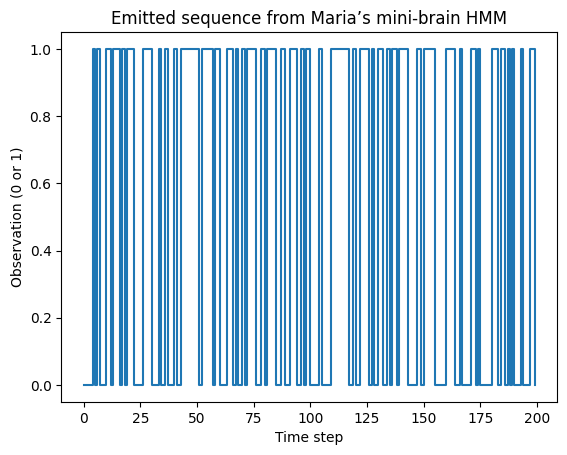

In [47]:
import numpy as np

A=np.array([[0.1,0.2,.7],[0.3,0.4,0.3],[0.5,0.4,0.1]])
g_x=np.array([[0.9,0.1],[0.2,0.8],[0.5,0.5]])
mu = np.array([0.5, 0.3, 0.2])

def sample_observed_sequence(A,g_x,T=1000):
    i = np.random.choice([0,1,2], p=mu)
    i=0
    emissions=[i]
    hidden_states=[]
    for t in range(T):
        state_transition_distribution=A[i]
        new_state=np.random.choice([0,1,2], 1, p=state_transition_distribution).item()
        emission_distribution=g_x[new_state]
        new_observation=np.random.choice([0,1],1, p=emission_distribution).item()
        emissions.append(new_observation)
        hidden_states.append(new_state)
    return hidden_states, emissions

hidden_states, emissions=sample_observed_sequence(A,g_x)
print(emissions)

def log_probs_full_model(hidden_states, emissions, A, g_x):
    log_prob_X_Y=np.log(mu[hidden_states[0]])
    for h in range(len(hidden_states)-1):
        log_prob_X_Y+=np.log(A[hidden_states[h],hidden_states[h+1]])
        log_prob_X_Y+=np.log(g_x[hidden_states[h+1],emissions[h+1]])
    return log_prob_X_Y

log_prob_X_Y=log_probs_full_model(hidden_states,emissions, A, g_x)
print(log_prob_X_Y)

import matplotlib.pyplot as plt

plt.plot(emissions[:200], drawstyle="steps-post")
plt.title("Emitted sequence from Maria’s mini-brain HMM")
plt.xlabel("Time step")
plt.ylabel("Observation (0 or 1)")
plt.show()


